In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
ls

bayes.ipynb                main.py        SupportVectorMachine.ipynb
data_preprocessing.ipynb   Model.py       svm.ipynb
logistic.ipynb             __pycache__/   temporaryFile.ipynb
logistic_regression.ipynb  spambase/
LrSvmBaysian.ipynb         spambase.data


In [3]:
d = 58 # 57 input attributes + 1 target label

labels = ['f' + str(i) for i in range(1, d)]
labels.append('t')

labels

['f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 't']

In [4]:
data = pd.read_csv('spambase.data', header = None)

data.columns = labels

In [5]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f49,f50,f51,f52,f53,f54,f55,f56,f57,t
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [6]:
target = data['t']
data = data.drop(columns = 't')

In [7]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749


In [8]:
target.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: t, dtype: int64

In [9]:
# normalizing the feature values by dividing each column by its mean

for col in data.columns:
    column = data[col]
    
    mean = 0
    for val in column:
        mean += val
    mean = mean/(len(column) + 0.0)
    
    new_column = []
    
    for val in column:
        new_column.append(val / mean)
        
    data[col] = new_column     

In [10]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57
0,0.000000,3.004489,2.280369,0.0,1.024907,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,2.891432,0.000000,0.000000,0.723488,1.169192,0.981329
1,2.008544,1.314464,1.781538,0.0,0.448397,2.919681,1.838754,0.664802,0.000000,3.926267,...,0.0,0.000000,0.949432,0.0,1.382535,2.374335,1.085035,0.985069,1.935875,3.628799
2,0.573870,0.000000,2.529784,0.0,3.939487,1.981212,1.663634,1.139661,7.105792,1.044220,...,0.0,0.259238,1.028552,0.0,1.025752,2.427098,0.226049,1.891741,9.296034,7.974181
3,0.000000,0.000000,0.000000,0.0,2.017786,0.000000,2.714351,5.983218,3.441868,2.631434,...,0.0,0.000000,0.985396,0.0,0.509160,0.000000,0.000000,0.681304,0.766683,0.674222
4,0.000000,0.000000,0.000000,0.0,2.017786,0.000000,2.714351,5.983218,3.441868,2.631434,...,0.0,0.000000,0.971010,0.0,0.501727,0.000000,0.000000,0.681304,0.766683,0.674222
5,0.000000,0.000000,0.000000,0.0,5.925244,0.000000,0.000000,17.569768,0.000000,0.000000,...,0.0,0.000000,1.603965,0.0,0.000000,0.000000,0.000000,0.577866,0.287506,0.190618
6,0.000000,0.000000,0.000000,0.0,6.149442,0.000000,0.000000,0.000000,0.000000,2.673203,...,0.0,0.000000,0.388404,0.0,0.609505,0.712301,0.000000,0.321871,0.076668,0.395356
7,0.000000,0.000000,0.000000,0.0,6.021329,0.000000,0.000000,17.854684,0.000000,0.000000,...,0.0,0.000000,1.481690,0.0,0.000000,0.000000,0.000000,0.471924,0.210838,0.172968
8,1.434674,0.000000,1.639015,0.0,1.953729,0.000000,2.626791,0.000000,10.214575,3.174429,...,0.0,0.000000,1.949214,0.0,0.672685,2.677723,0.497308,1.876909,8.529351,4.437160
9,0.573870,0.563342,2.743568,0.0,0.608539,3.336778,3.327269,0.000000,0.666168,0.000000,...,0.0,1.036950,0.215780,0.0,0.906824,1.068451,0.000000,0.333043,0.824184,2.643940


In [11]:
# relabeling targets .ie. {1 - spam, 0 - not spam} (old) ----> {1,-1} (new)

new_target = target

for i in range(0, len(new_target)):
    if new_target[i] == 1:
        new_target[i] = 1
    else:
        new_target[i] = -1

target = pd.DataFrame(new_target, columns = ['t'])

# new_target = []

# for val in target['t']:
#     if val == 1:
#         new_target.append(1)
#     else:
#         new_target.append(-1)

# target = pd.DataFrame(new_target, columns = ['t'])

In [12]:
target.head(10)

,t
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [13]:
target['t'].unique()

array([ 1, -1])

In [14]:
import math, random

def train_test_split(X, y, f):
    # f : fraction of samples taken for training; in the range (0,1)
    n = X.shape[0]
    m = math.floor(f * n)
    row_indices = [i for i in range(0, X.shape[0])]

    random.shuffle(row_indices)
    test_rows = row_indices[0:n-m]

    train_rows = [i for i in range(0, m)]
    
    X_test = pd.DataFrame(columns = labels[0:len(labels)-1])
    y_test = pd.DataFrame(columns = ['t'])
    
    for row in test_rows:
        X_test.loc[len(X_test)] = X.iloc[row]
        y_test.loc[len(y_test)] = y.iloc[row]
    
    X_train = pd.DataFrame(X.drop(X.index[test_rows]))
    y_train = pd.DataFrame(y.drop(y.index[test_rows]))
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 0.9)

In [16]:
X_train.shape

(4140, 57)

In [17]:
X_test.shape

(461, 57)

In [18]:
y_train.shape

(4140, 1)

In [19]:
y_test.shape

(461, 1)

In [20]:
def hinge_loss(w, X, y):
    loss = 0
    for i in range(0, X.shape[0]):
        x_i = X.iloc[i]
        y_i = y.iloc[i-1, 0]
        loss += max(0, 1 - float(y_i * np.inner(w, x_i)))    
    loss /= X_test.shape[0]
    return loss

In [21]:
import random
import numpy as np

loss_training = []
loss_test = []

def soft_svm_using_sgd(X, y, m, d):
    w_opt = np.zeros((1,d))
    v = np.zeros((1,d))
    T = 500
    reg_param = 1
    for t in range(1,T+1):
        w = (1 / (reg_param * t)) * v
        i = random.randint(1,m)
        x_i = X[i-1, :]
        y_i = y.iloc[i-1, 0]
        if (y_i * (np.inner(w, x_i))) < 1:
            v = v + y_i * x_i
        w_opt += w
        loss_training.append(hinge_loss(w, X_train, y_train))
        loss_test.append(hinge_loss(w, X_test, y_test))
    w_opt /= (T + 0.0)
    return w_opt        

In [22]:
def fit(X_train, y_train):
    """
    Finds the appropriate parameters (w,b)
    :param X_train: the training examples 
    :param y_train: the corresponding targets
    :return:   
    """
    # dim(X_train) : m x d 
    # dim(y_train) : m x 1 
    
    m = y_train.shape[0] # number of samples
    d = X_train.shape[1] # size of feature space
    
#     ones = np.ones((m,1)) # for affine to homogeneous conversion
    
#     X = np.hstack((X_train, ones)) # dim : m x (d+1) 
    X = X_train.to_numpy() # dim : m x d
    y = y_train # dim : m x 1 
    
    w_opt = soft_svm_using_sgd(X, y, m, d)

    return w_opt

In [23]:
w_opt = fit(X_train, y_train)

In [24]:
w_opt

array([[-0.18702576, -0.12100139, -0.07106835,  0.        ,  0.0662354 ,
         0.00954345,  0.12050689, -0.01788157,  0.04924724,  0.07826339,
         0.05087135, -0.10431569, -0.05420754,  0.03071707,  0.03170677,
         0.09820698,  0.00154201,  0.10323384,  0.03138643,  0.03037831,
         0.11175645,  0.05177312,  0.08850072,  0.1042485 , -0.11324121,
        -0.08442895, -0.09289192, -0.01392193, -0.06033792, -0.07507342,
        -0.01771094, -0.04382098, -0.03334512, -0.04310022, -0.06804814,
        -0.04880704, -0.07006814,  0.08148572, -0.07592646, -0.00904278,
        -0.04342409, -0.17533357, -0.13862925, -0.09734124, -0.12745478,
        -0.11917325, -0.07973022, -0.04786742, -0.11031313, -0.07463502,
        -0.25605969,  0.11659961,  0.13055316,  0.00857502,  0.03575279,
         0.04793374,  0.11681768]])

In [25]:
from numpy import linalg as la
la.norm(w_opt)

0.675500630041428

In [26]:
# loss = 0
# for i in range(0, X_test.shape[0]):
#     x_i = X_test.iloc[i]
#     y_i = y_test.iloc[i-1, 0]
#     loss += max(0, 1 - (y_i * np.inner(w_opt, x_i)))    
# loss /= X_test.shape[0]

In [27]:
# loss = 0
# for i in range(0, X_train.shape[0]):
#     x_i = X_train.iloc[i]
#     y_i = y_train.iloc[i-1, 0]
#     loss += max(0, 1 - (y_i * np.inner(w_opt, x_i)))    
# loss /= X_train.shape[0]

In [28]:
# loss

In [29]:
loss_test

[1.0,
 5.8532162919094635,
 4.73897284663353,
 3.7083491352444717,
 3.09475193255066,
 3.738073618549075,
 3.2777520028841374,
 2.933764993975356,
 2.668671219133361,
 3.4627295837240926,
 3.202582493484978,
 2.986391916217002,
 2.803743184032552,
 2.6479130907296042,
 2.513239278879677,
 2.39557952407839,
 2.2893903487654996,
 2.272966490530488,
 2.354825143005759,
 2.2669120417527977,
 2.323294724810076,
 2.2448318230653626,
 2.3931789726825343,
 1.9347320510165302,
 1.8815353691229146,
 1.832634421102089,
 2.359721029567988,
 2.363197047870372,
 2.3029495519537844,
 2.504753406063712,
 2.4429616223517243,
 2.3851516535822355,
 2.760226656209323,
 2.695584693898852,
 2.905890597593256,
 2.8411391173877534,
 2.7798929725674766,
 2.721974281615291,
 2.667261499277573,
 2.980580024849912,
 3.2901611865692213,
 3.2252569902596653,
 3.1634405428771104,
 3.2667275702147687,
 3.2071006042051775,
 3.147970047913309,
 3.0935456148082157,
 3.0414220617029715,
 2.991516547997939,
 2.94365834807

In [30]:
loss_training

[8.980477223427332,
 65.57932326264987,
 29.476195368758432,
 23.267511588433983,
 19.569936457220006,
 23.954961438764137,
 21.135286826019513,
 19.03636355455321,
 17.415653207861318,
 10.749139609549855,
 10.101127772541883,
 9.56805641212968,
 9.122886220969269,
 8.747089758755827,
 8.427073108954646,
 8.152504315692124,
 7.912444431186659,
 10.137626940953076,
 9.306224090586667,
 9.020690296705922,
 10.24065416264785,
 9.95008581224911,
 8.944940274388971,
 9.097963924189221,
 8.892993718877362,
 8.705387155628175,
 10.548725966023992,
 10.029133618349954,
 9.813150586336663,
 9.30359844541449,
 9.120722617218224,
 8.949855977380993,
 8.836275014305114,
 8.680123221467811,
 6.865976290342947,
 6.7503293120095025,
 6.641228504561908,
 6.538729573601513,
 6.442841159609763,
 6.389057840415165,
 6.361751798396959,
 6.278300216991334,
 6.199559188348729,
 5.780093967162521,
 5.712037783291759,
 5.652965539303552,
 5.591793755221513,
 5.533731764081247,
 5.478556415056725,
 5.42598968

In [31]:
iterations = [i for i in range(1,501)]
loss = [loss_training, loss_test]

In [32]:
# import matplotlib.pyplot as plt 
 
# plt.plot(iterations, loss_training, color='blue', linewidth=2, label='Training loss') 
# plt.plot(iterations, loss_test, color='red', linewidth=2, label='True loss') 
# plt.xlabel('iterations')
# plt.ylabel('error') 
  
# # giving a title to my graph 
# plt.title('Error vs iterations') 

# plt.legend()

# # function to show the plot 
# plt.show()


# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()


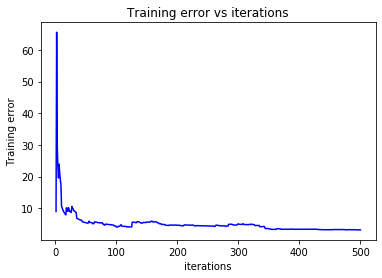

In [34]:
import matplotlib.pyplot as plt 
 
plt.plot(iterations, loss_training, color='blue')
plt.xlabel('iterations')
plt.ylabel('Training error') 
  
# giving a title to my graph 
plt.title('Training error vs iterations') 

# plt.legend()

# function to show the plot 
plt.show()

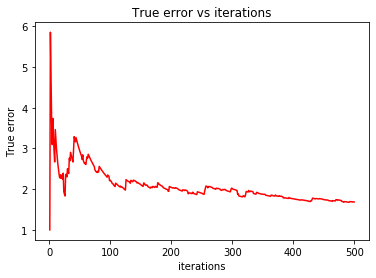

In [35]:
import matplotlib.pyplot as plt 
 
plt.plot(iterations, loss_test, color='red') 
plt.xlabel('iterations')
plt.ylabel('True error') 
  
# giving a title to my graph 
plt.title('True error vs iterations') 

# plt.legend()

# function to show the plot 
plt.show()